In [ ]:
import joblib
import numpy as np
import pandas as pd
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [ ]:
diabetes_dataset = pd.read_csv('/content/diabetes.csv')

In [ ]:
diabetes_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
print(diabetes_dataset.info())
print(diabetes_dataset.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std    

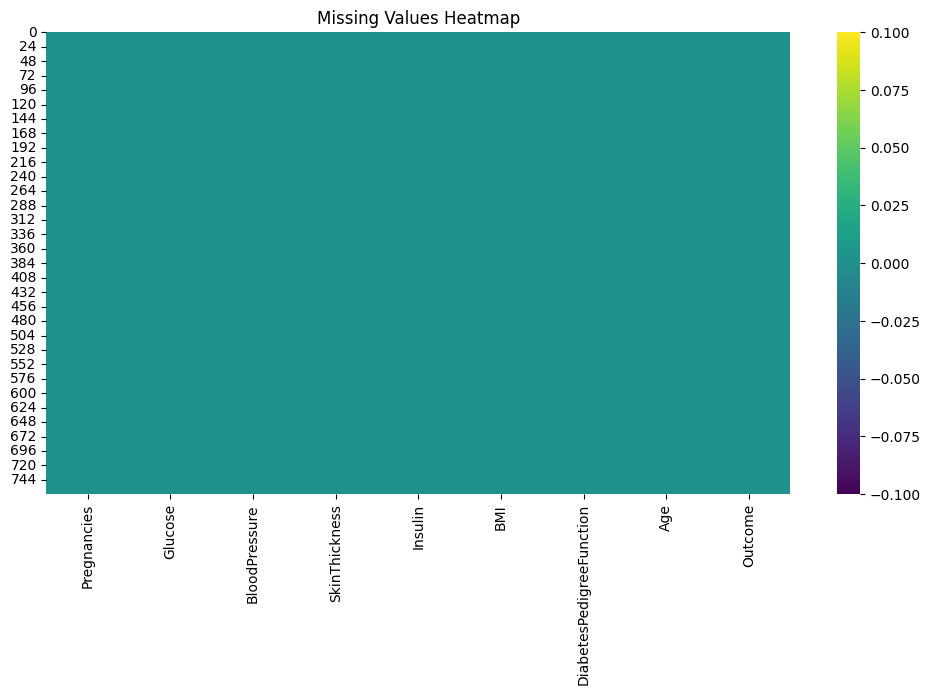

In [ ]:
# Visualizing missing values using seaborn heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(diabetes_dataset.isnull(), cbar=True, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

In [ ]:
#checking for missing values
diabetes_dataset.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
# number of rows and Columns in this dataset
diabetes_dataset.shape

(768, 9)

In [ ]:
# getting the statistical measures of the data
diabetes_dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
diabetes_dataset['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [ ]:
diabetes_dataset.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [ ]:
# separating the data and labels
X = diabetes_dataset.drop(columns = 'Outcome', axis=1)
Y = diabetes_dataset['Outcome']

In [ ]:
print(X)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [ ]:
print(Y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


Data Standardization

In [ ]:
scaler = StandardScaler()

In [ ]:
scaler.fit(X)

StandardScaler()

In [ ]:
standardized_data = scaler.transform(X)

In [ ]:
print(standardized_data)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [ ]:
X = standardized_data
Y = diabetes_dataset['Outcome']

In [ ]:
print(X)
print(Y)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]
0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, stratify=Y, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(768, 8) (614, 8) (154, 8)


Trainig Models

Logistic Regression

In [ ]:
# Initialize and train the Logistic Regression model
log_reg = LogisticRegression(max_iter=200)
log_reg.fit(X_train, Y_train)

LogisticRegression(max_iter=200)

In [ ]:
# Make predictions
y_pred = log_reg.predict(X_test)

# Evaluate the model
lr_accuracy = accuracy_score(Y_test, y_pred)
lr_precision = precision_score(Y_test, y_pred, average='weighted')
lr_recall = recall_score(Y_test, y_pred, average='weighted')
lr_f1 = f1_score(Y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(Y_test, y_pred)

print(f'Logistic Regression Accuracy: {lr_accuracy:.2f}')
print(f'Precision: {lr_precision:.2f}')
print(f'Recall: {lr_recall:.2f}')
print(f'F1 Score: {lr_f1:.2f}')
print(f'Confusion Matrix:\n{conf_matrix}')

Logistic Regression Accuracy: 0.76
Precision: 0.75
Recall: 0.76
F1 Score: 0.75
Confusion Matrix:
[[89 11]
 [26 28]]


Support Vector Machine (SVM)

In [ ]:
# Initialize and train the SVM model
svm = SVC(kernel='linear')
svm.fit(X_train, Y_train)

SVC(kernel='linear')

In [ ]:
# Make predictions
y_pred = svm.predict(X_test)

# Evaluate the model
svm_accuracy = accuracy_score(Y_test, y_pred)
svm_precision = precision_score(Y_test, y_pred, average='weighted')
svm_recall = recall_score(Y_test, y_pred, average='weighted')
svm_f1 = f1_score(Y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(Y_test, y_pred)

print(f'Support Vector Machine Accuracy: {svm_accuracy:.2f}')
print(f'Precision: {svm_precision:.2f}')
print(f'Recall: {svm_recall:.2f}')
print(f'F1 Score: {svm_f1:.2f}')
print(f'Confusion Matrix:\n{conf_matrix}')

Support Vector Machine Accuracy: 0.77
Precision: 0.77
Recall: 0.77
F1 Score: 0.76
Confusion Matrix:
[[91  9]
 [26 28]]


K-Nearest Neighbors (KNN)

In [ ]:
# Initialize and train the KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, Y_train)

KNeighborsClassifier()

In [ ]:
# Make predictions
y_pred = svm.predict(X_test)

# Evaluate the model
knn_accuracy = accuracy_score(Y_test, y_pred)
knn_precision = precision_score(Y_test, y_pred, average='weighted')
knn_recall = recall_score(Y_test, y_pred, average='weighted')
knn_f1 = f1_score(Y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(Y_test, y_pred)

print(f'Support Vector Machine Accuracy: {knn_accuracy:.2f}')
print(f'Precision: {knn_precision:.2f}')
print(f'Recall: {knn_recall:.2f}')
print(f'F1 Score: {knn_f1:.2f}')
print(f'Confusion Matrix:\n{conf_matrix}')

Support Vector Machine Accuracy: 0.77
Precision: 0.77
Recall: 0.77
F1 Score: 0.76
Confusion Matrix:
[[91  9]
 [26 28]]


Random Forest

In [ ]:
# Initialize and train the Random Forest model
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)

RandomForestClassifier()

In [ ]:
# Make predictions
y_pred = random_forest.predict(X_test)

# Evaluate the model
rf_accuracy = accuracy_score(Y_test, y_pred)
rf_precision = precision_score(Y_test, y_pred, average='weighted')
rf_recall = recall_score(Y_test, y_pred, average='weighted')
rf_f1 = f1_score(Y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(Y_test, y_pred)

print(f'Random Forest Accuracy: {rf_accuracy:.2f}')
print(f'Precision: {rf_precision:.2f}')
print(f'Recall: {rf_recall:.2f}')
print(f'F1 Score: {rf_f1:.2f}')
print(f'Confusion Matrix:\n{conf_matrix}')

Random Forest Accuracy: 0.75
Precision: 0.74
Recall: 0.75
F1 Score: 0.74
Confusion Matrix:
[[86 14]
 [25 29]]


Neural Network

In [ ]:
# Initialize and train the Neural Network model
neural_net = MLPClassifier(max_iter=1000)
neural_net.fit(X_train, Y_train)

MLPClassifier(max_iter=1000)

In [ ]:
# Make predictions
y_pred = neural_net.predict(X_test)

# Evaluate the model
nn_accuracy = accuracy_score(Y_test, y_pred)
nn_precision = precision_score(Y_test, y_pred, average='weighted')
nn_recall = recall_score(Y_test, y_pred, average='weighted')
nn_f1 = f1_score(Y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(Y_test, y_pred)

print(f'Neural Network Accuracy: {nn_accuracy:.2f}')
print(f'Precision: {nn_precision:.2f}')
print(f'Recall: {nn_recall:.2f}')
print(f'F1 Score: {nn_f1:.2f}')
print(f'Confusion Matrix:\n{conf_matrix}')

Neural Network Accuracy: 0.72
Precision: 0.71
Recall: 0.72
F1 Score: 0.71
Confusion Matrix:
[[86 14]
 [29 25]]


In [ ]:
# Create a dictionary to store the results
results = {
    'Model': ['Logistic Regression', 'K-Nearest Neighbors', 'Support Vector Machine', 'Random Forest', 'Neural Network'],
    'Accuracy': [lr_accuracy, knn_accuracy, svm_accuracy, rf_accuracy, nn_accuracy],
    'Precision': [lr_precision, knn_precision, svm_precision, rf_precision, nn_precision],
    'Recall': [lr_recall, knn_recall, svm_recall, rf_recall, nn_recall],
    'F1 Score': [lr_f1, knn_f1, svm_f1, rf_f1, nn_f1]
}

# Convert the dictionary to a DataFrame for easier comparison
results_df = pd.DataFrame(results)

# Print the results
print(results_df)

                    Model  Accuracy  Precision    Recall  F1 Score
0     Logistic Regression  0.759740   0.754289  0.759740  0.748746
1     K-Nearest Neighbors  0.772727   0.770407  0.772727  0.760401
2  Support Vector Machine  0.772727   0.770407  0.772727  0.760401
3           Random Forest  0.746753   0.739585  0.746753  0.738995
4          Neural Network  0.720779   0.710377  0.720779  0.708002


Making a Predictive System

In [ ]:
input_data = (5,166,72,19,175,25.8,0.587,51)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the input data
std_data = scaler.transform(input_data_reshaped)
print(std_data)

prediction = svm.predict(std_data)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[[ 0.3429808   1.41167241  0.14964075 -0.09637905  0.82661621 -0.78595734
   0.34768723  1.51108316]]
[1]
The person is diabetic


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(svm, 'svm_model.pkl')

['svm_model.pkl']

In [ ]:
from google.colab import files

# Download the saved files
files.download('scaler.pkl')
files.download('svm_model.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>